In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DATA_PATH = "../data"

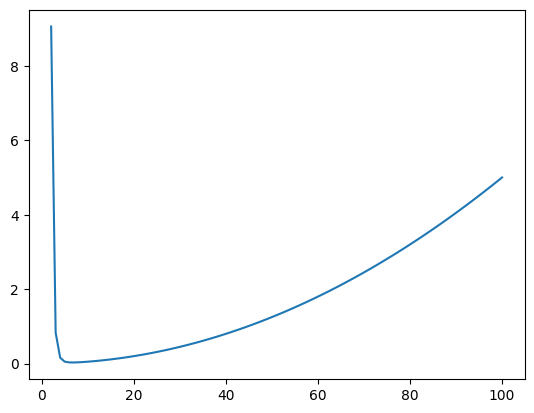

In [8]:
values = np.loadtxt(f"{DATA_PATH}/potential_value.dat", delimiter = "\t", skiprows = 1)

fig, ax = plt.subplots()
ax.plot(values[:, 0], values[:, 1]);

In [ ]:
import shielded_mol_py as sm

d = 2.72 * 3.33564e-30
delta_r = 0.1
theta = np.pi / 2
M = 1.029e-25
mu = M / 2
omega_trap = 3.5 * 2 * np.pi * 1e5
xi = 0
Omega = 40 * 2 * np.pi * 1e6
lho = np.sqrt(1 / (mu * omega_trap))
Eho = omega_trap
C3 = d**2 / (48 * np.pi * epsilon_0 * (1 + delta_r**2)) / (Eho * lho**3)
C6 = d**4 / (128 * np.pi**2 * epsilon_0**2 * Omega * (1 + delta_r**2)**1.5) / (Eho * lho**6)

l_max = 6

params = sm.SystemParams(l_max, "even", C6, C3, xi, omega_trap, mu, 0.)
problem = sm.Problem(params, 2., 10., 100.)
problem.step_rule(1e-4, 10., 500)


bounds = problem.bound_states((-10., 0.1), 1e-4)
for b in bounds:
    print(b.nodes, b.energy)

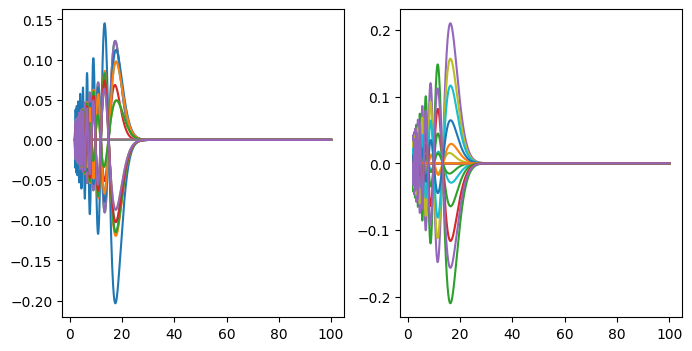

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

(r, values) = problem.wave_function(bounds[-1])
values = np.array(values)
axes[0].plot(r, values)

(r, values) = problem.wave_function(bounds[0])
values = np.array(values)
axes[1].plot(r, values);